In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
df = pd.read_csv('TSLA.csv') # Đọc dữ liệu từ file CSV mã mới

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Volatility
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,NaN
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.452666
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,-0.052666
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,-0.133334
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,-0.200000
...,...,...,...,...,...,...,...
3514,2024-06-14,185.800003,186.000000,176.919998,178.009995,82038200,-2.589996
3515,2024-06-17,177.919998,188.809998,177.000000,187.440002,109786100,-7.880005
3516,2024-06-18,186.559998,187.199997,182.369995,184.860001,68982300,8.639999
3517,2024-06-20,184.679993,185.210007,179.660004,181.570007,55893100,-1.880005


In [ ]:
X, y = create_dataset(df['Close'], df['Open'], time_steps = 5)

In [ ]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (3514, 5)
Shape of y: (3514,)


In [ ]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
scaled_data_X = scaler_x.fit_transform(X)
scaled_data_y = scaler_y.fit_transform(y.reshape(-1, 1))

In [ ]:
train_size = int(len(scaled_data_X) * 0.8)

X_train, X_test = scaled_data_X[:train_size], scaled_data_X[train_size:]
y_train, y_test = scaled_data_y[:train_size], scaled_data_y[train_size:]

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2811, 5) (2811, 1) (703, 5) (703, 1)


In [ ]:
def create_model():
    model = Sequential()
    model.add(LSTM(units=60, return_sequences=True, input_shape=(X_train.shape[1],1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=60, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=60, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=60, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=60))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    return model

In [ ]:
checkpoint = ModelCheckpoint('best.weights.h5', save_weights_only=True, save_best_only=True, monitor='loss', mode='min')
model = create_model()
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=200, batch_size=32, use_multiprocessing=True, callbacks=[checkpoint])

22/22 [==============================] - 2s 7ms/step


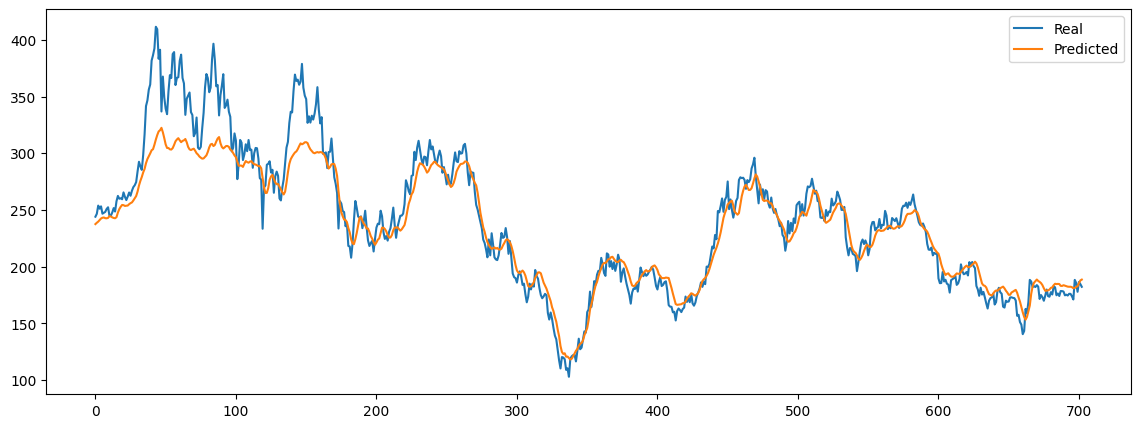

In [ ]:
model.load_weights('/content/best.weights.h5')
# Dự đoán giá trị trên tập kiểm tra
y_pred = model.predict(X_test)

# Biến đổi ngược giá trị đã chuẩn hóa về dạng ban đầu
y_test_inverse = scaler_y.inverse_transform(y_test)
y_pred_inverse = scaler_y.inverse_transform(y_pred)

# Vẽ biểu đồ
plt.figure(figsize=(14, 5))
plt.plot(y_test_inverse, label='Real')
plt.plot(y_pred_inverse, label='Predicted')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y_test_inverse, y_pred_inverse)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 442.76974626637485


In [ ]:
df = df.dropna()
X, y = create_dataset(df['Volatility'], df['Volatility'], time_steps = 5)

In [ ]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
scaled_data_X = scaler_x.fit_transform(X)
scaled_data_y = scaler_y.fit_transform(y.reshape(-1, 1))

In [ ]:
train_size = int(len(scaled_data_X) * 0.8)

X_train, X_test = scaled_data_X[:train_size], scaled_data_X[train_size:]
y_train, y_test = scaled_data_y[:train_size], scaled_data_y[train_size:]

In [ ]:
model_2 = create_model()
model_2.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
checkpoint_2 = ModelCheckpoint('best_2.weights.h5', save_weights_only=True, save_best_only=True, monitor='loss', mode='min')

In [ ]:
model_2.fit(X_train, y_train, epochs=200, batch_size=32, use_multiprocessing=True, callbacks=[checkpoint_2])

In [ ]:
model_2.load_weights('/content/best_2.weights.h5')

# Dự đoán giá trị trên tập kiểm tra
y_pred = model_2.predict(X_train)

# Biến đổi ngược giá trị đã chuẩn hóa về dạng ban đầu
y_test_inverse = scaler_y.inverse_transform(y_train)
y_pred_inverse = scaler_y.inverse_transform(y_pred)


In [ ]:
open_real = df['Open'].tail(len(X_test)+1)
open_test =open_real[1:].values

open_pred = y_pred_inverse.flatten() + open_real[:-1].values

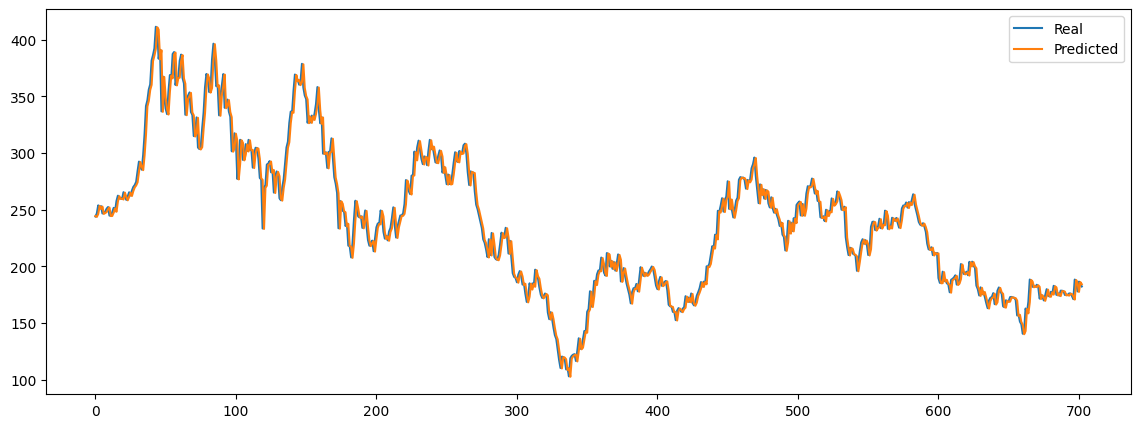

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(open_test, label='Real')
plt.plot(open_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
mse_2 = mean_squared_error(open_test, open_pred)

print(f'Mean Squared Error: {mse_2}')

Mean Squared Error: 95.35003246352599
